In [27]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
app_train = pd.read_csv("../raw/application_train.csv")
app_test = pd.read_csv("../raw/application_test.csv")

In [5]:
print("Train shape:", app_train.shape) 
print("Test shape:", app_test.shape)

Train shape: (307511, 122)
Test shape: (48744, 121)


In [8]:

app_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


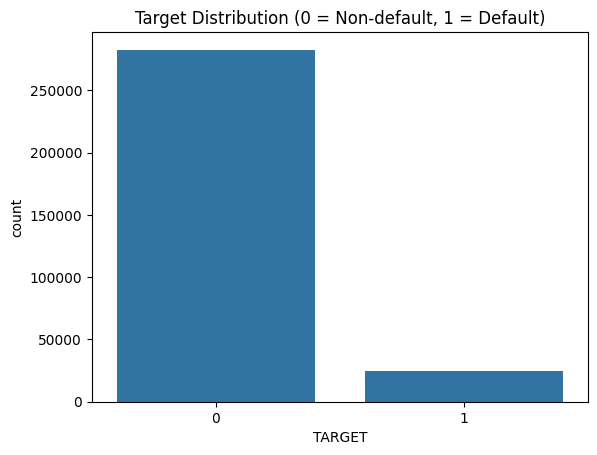

In [10]:
sns.countplot(x="TARGET", data=app_train)
plt.title("Target Distribution (0 = Non-default, 1 = Default)")
plt.show()


In [11]:
missing = app_train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing.head(10)


COMMONAREA_MEDI             214865
COMMONAREA_MODE             214865
COMMONAREA_AVG              214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_AVG        210199
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
dtype: int64

In [12]:
app_train.describe().T.head(10)


,count,mean,std,min,25%,50%,75%,max
SK_ID_CURR,307511.0,278180.518577,102790.175348,100002.00000,189145.500000,278202.00000,367142.500000,4.562550e+05
TARGET,307511.0,0.080729,0.272419,0.00000,0.000000,0.00000,0.000000,1.000000e+00
CNT_CHILDREN,307511.0,0.417052,0.722121,0.00000,0.000000,0.00000,1.000000,1.900000e+01
AMT_INCOME_TOTAL,307511.0,168797.919297,237123.146279,25650.00000,112500.000000,147150.00000,202500.000000,1.170000e+08
AMT_CREDIT,307511.0,599025.999706,402490.776996,45000.00000,270000.000000,513531.00000,808650.000000,4.050000e+06
AMT_ANNUITY,307499.0,27108.573909,14493.737315,1615.50000,16524.000000,24903.00000,34596.000000,2.580255e+05
AMT_GOODS_PRICE,307233.0,538396.207429,369446.460540,40500.00000,238500.000000,450000.00000,679500.000000,4.050000e+06
REGION_POPULATION_RELATIVE,307511.0,0.020868,0.013831,0.00029,0.010006,0.01885,0.028663,7.250800e-02
DAYS_BIRTH,307511.0,-16036.995067,4363.988632,-25229.00000,-19682.000000,-15750.00000,-12413.000000,-7.489000e+03
DAYS_EMPLOYED,307511.0,63815.045904,141275.766519,-17912.00000,-2760.000000,-1213.00000,-289.000000,3.652430e+05


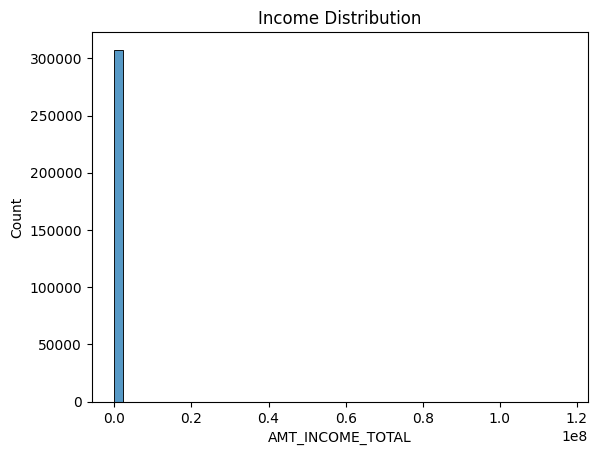

In [13]:
sns.histplot(app_train["AMT_INCOME_TOTAL"], bins=50)
plt.title("Income Distribution")
plt.show()


NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: count, dtype: int64


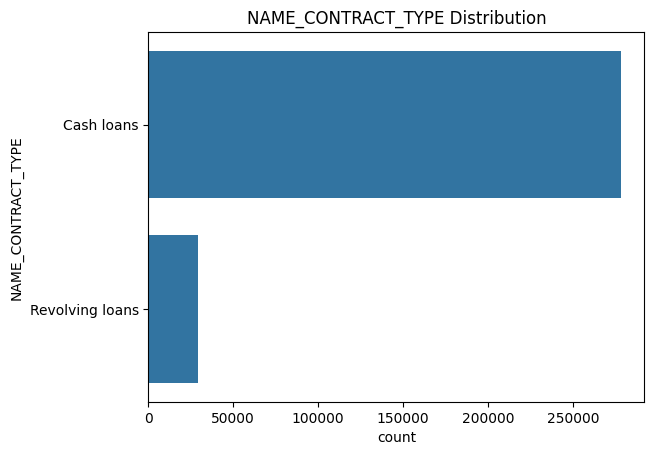

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64


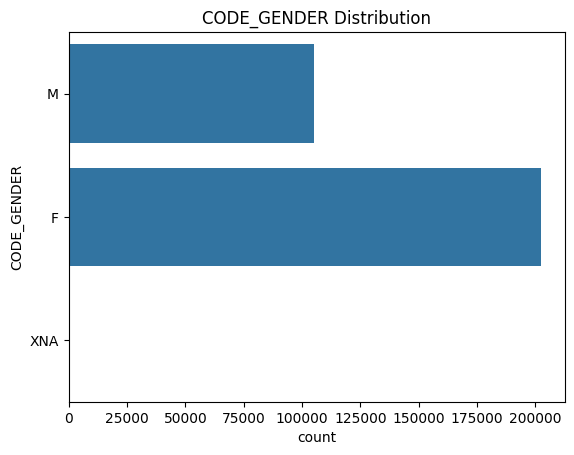

NAME_EDUCATION_TYPE
Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: count, dtype: int64


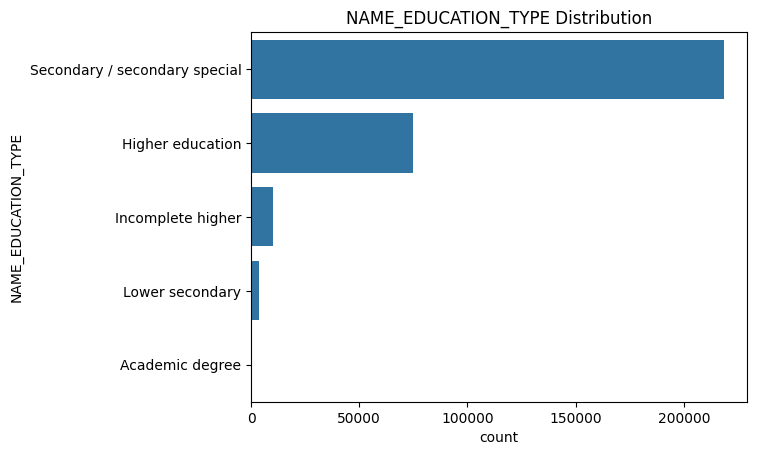

In [14]:
for col in ["NAME_CONTRACT_TYPE", "CODE_GENDER", "NAME_EDUCATION_TYPE"]:
    print(app_train[col].value_counts())
    sns.countplot(y=col, data=app_train)
    plt.title(f"{col} Distribution")
    plt.show()


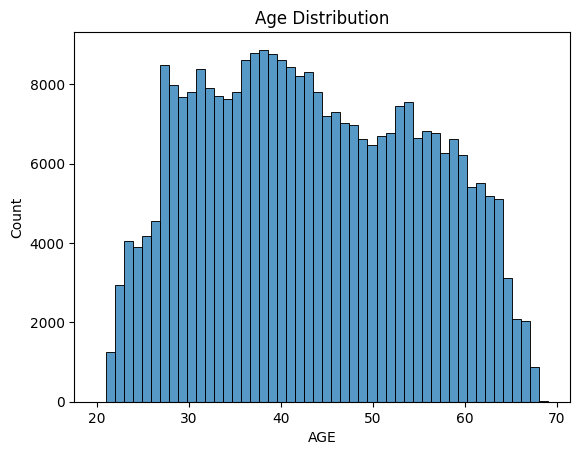

In [15]:
app_train["AGE"] = -app_train["DAYS_BIRTH"] // 365
sns.histplot(app_train["AGE"], bins=50)
plt.title("Age Distribution")
plt.show()


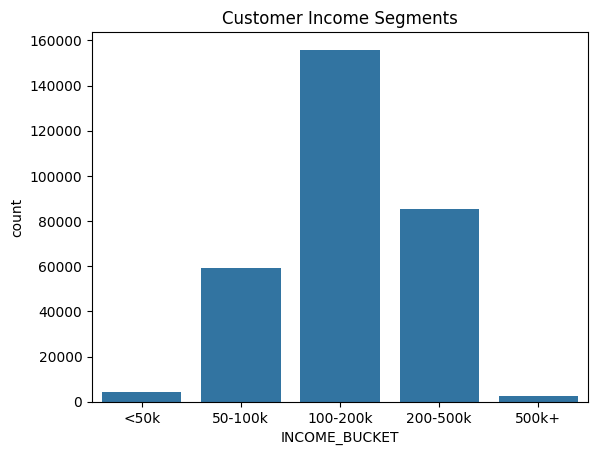

In [16]:
# Income buckets
app_train["INCOME_BUCKET"] = pd.cut(app_train["AMT_INCOME_TOTAL"],
                                    bins=[0,50000,100000,200000,500000,1000000],
                                    labels=["<50k","50-100k","100-200k","200-500k","500k+"])
sns.countplot(x="INCOME_BUCKET", data=app_train)
plt.title("Customer Income Segments")
plt.show()


C:\Users\SOUPARNO\AppData\Local\Temp\ipykernel_20456\1628241866.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  default_rate = app_train.groupby("INCOME_BUCKET")["TARGET"].mean()


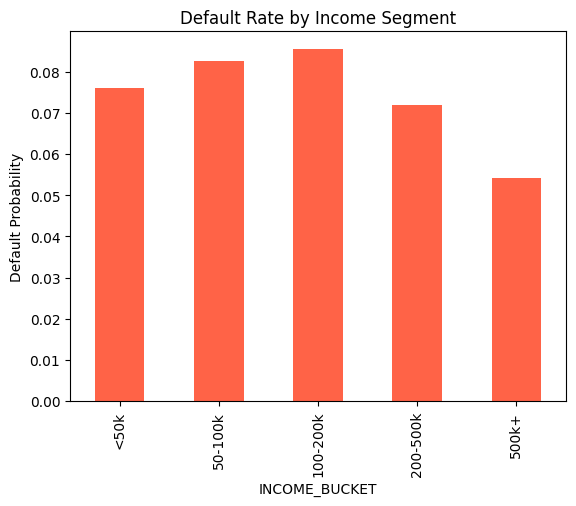

In [17]:
# Default rate by income bucket
default_rate = app_train.groupby("INCOME_BUCKET")["TARGET"].mean()
default_rate.plot(kind="bar", color="tomato")
plt.title("Default Rate by Income Segment")
plt.ylabel("Default Probability")
plt.show()


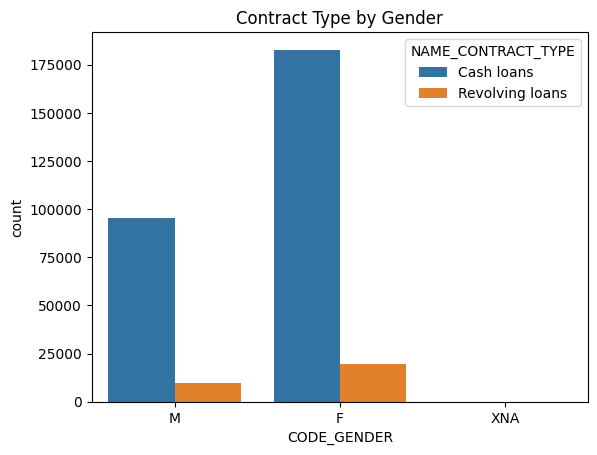

In [18]:
sns.countplot(x="CODE_GENDER", hue="NAME_CONTRACT_TYPE", data=app_train)
plt.title("Contract Type by Gender")
plt.show()


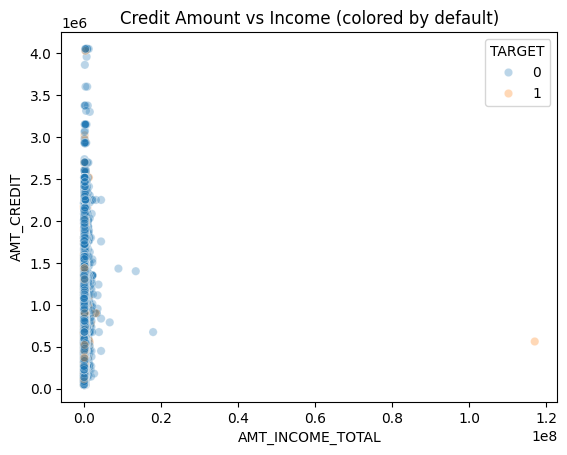

In [19]:
sns.scatterplot(x="AMT_INCOME_TOTAL", y="AMT_CREDIT", hue="TARGET", data=app_train, alpha=0.3)
plt.title("Credit Amount vs Income (colored by default)")
plt.show()


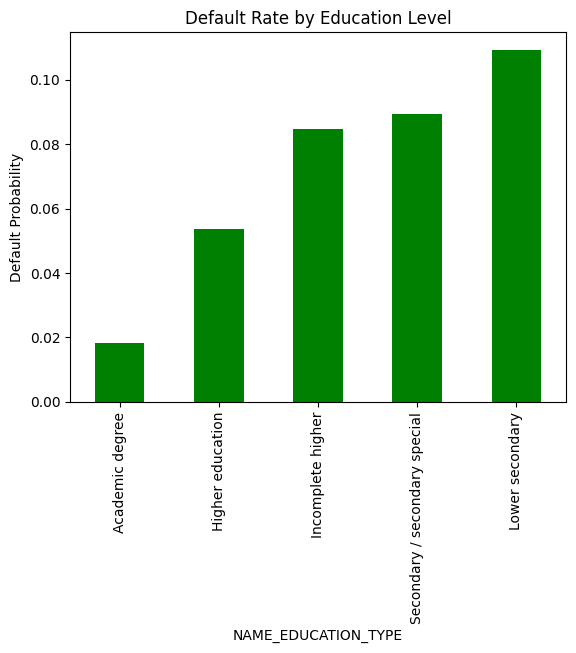

In [20]:
edu_default = app_train.groupby("NAME_EDUCATION_TYPE")["TARGET"].mean().sort_values()
edu_default.plot(kind="bar", color="green")
plt.title("Default Rate by Education Level")
plt.ylabel("Default Probability")
plt.show()


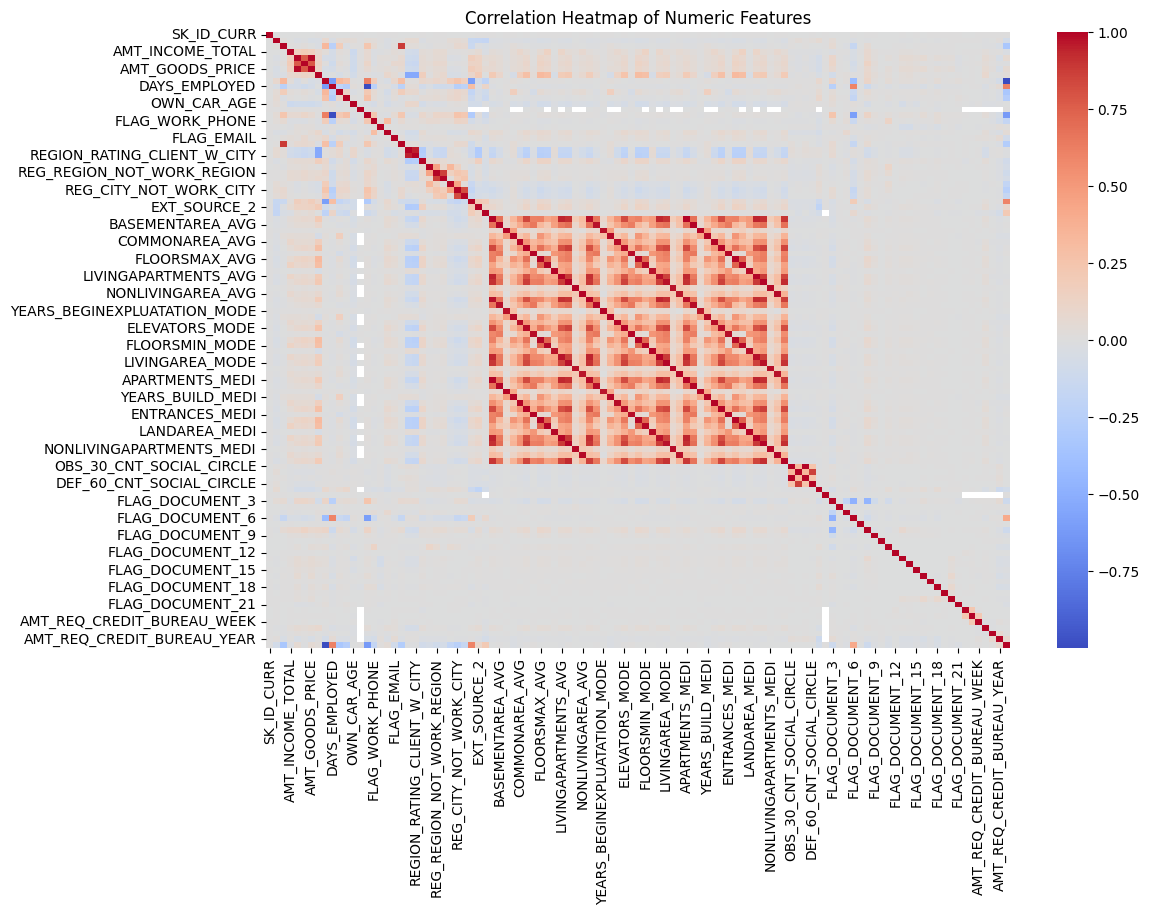

In [21]:
num_cols = app_train.select_dtypes(include="number").columns
corr = app_train[num_cols].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap of Numeric Features")
plt.show()


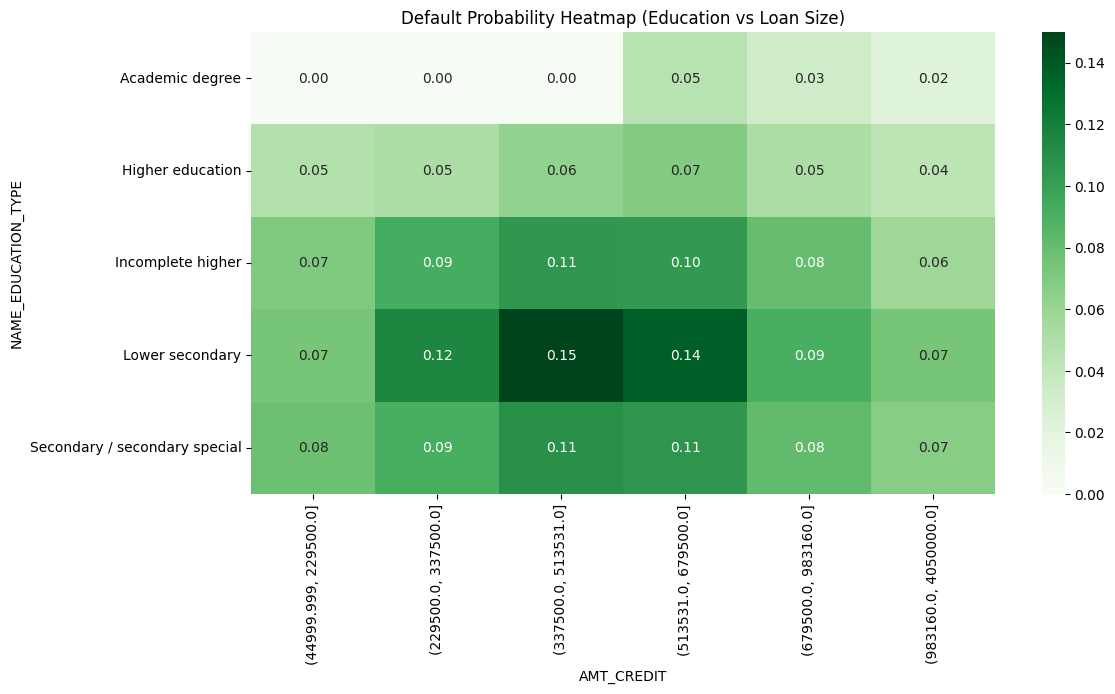

In [22]:
pivot_edu_credit = pd.crosstab(
    app_train["NAME_EDUCATION_TYPE"],
    pd.qcut(app_train["AMT_CREDIT"], 6),
    values=app_train["TARGET"],
    aggfunc="mean"
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_edu_credit, annot=True, cmap="Greens", fmt=".2f")
plt.title("Default Probability Heatmap (Education vs Loan Size)")
plt.show()

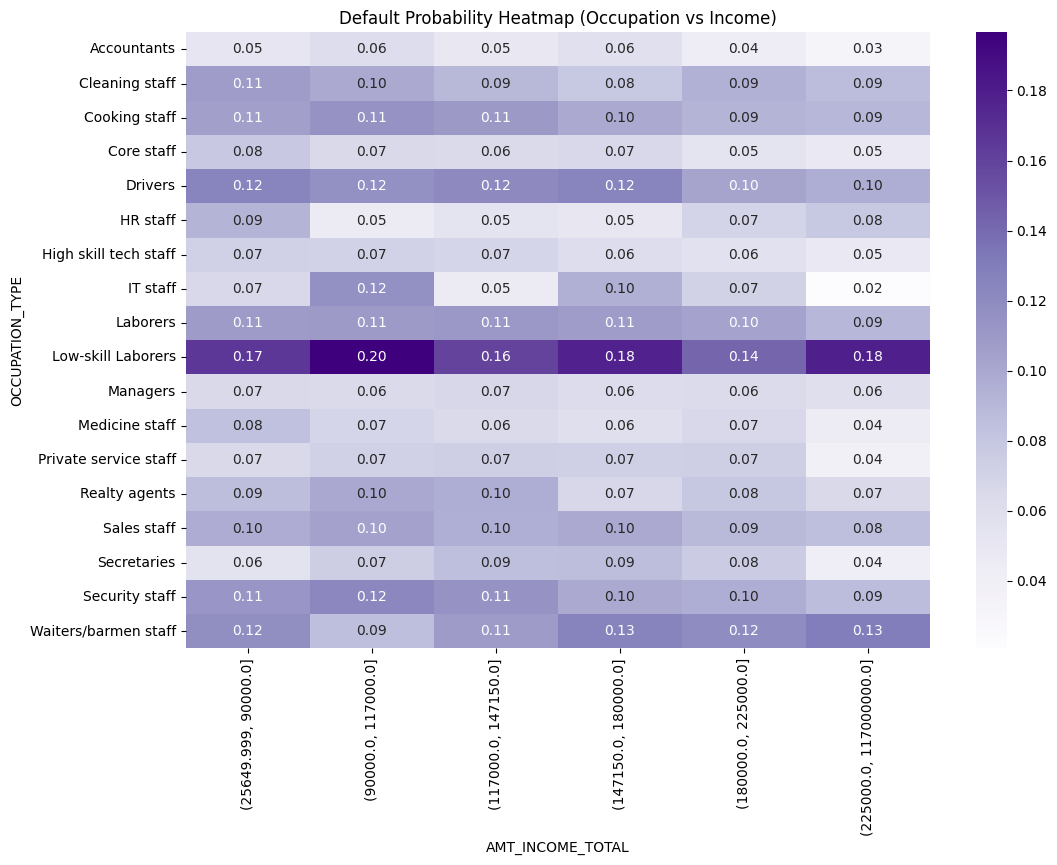

In [23]:
pivot_occ_income = pd.crosstab(
    app_train["OCCUPATION_TYPE"],
    pd.qcut(app_train["AMT_INCOME_TOTAL"], 6),
    values=app_train["TARGET"],
    aggfunc="mean"
)

plt.figure(figsize=(12,8))
sns.heatmap(pivot_occ_income, annot=True, cmap="Purples", fmt=".2f")
plt.title("Default Probability Heatmap (Occupation vs Income)")
plt.show()


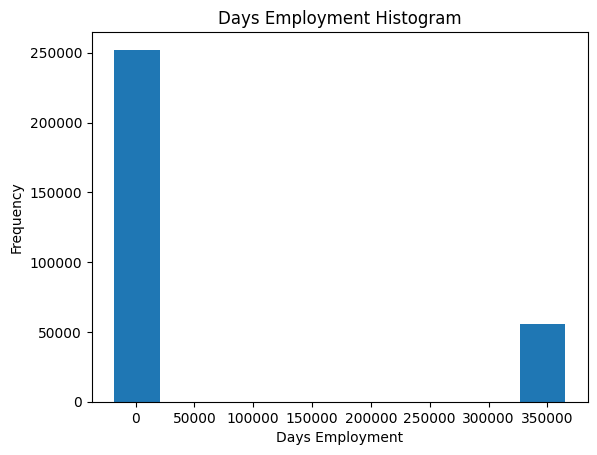

In [24]:
app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

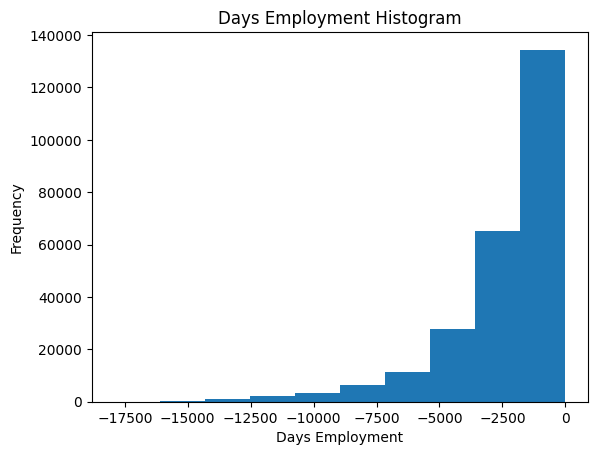

In [28]:
# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [29]:
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (app_test["DAYS_EMPLOYED_ANOM"].sum(), len(app_test)))

There are 9274 anomalies in the test data out of 48744 entries


In [31]:
# Find the correlation of the positive days since birth and target
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_train['DAYS_BIRTH'].corr(app_train['TARGET'])

np.float64(-0.07823930830982709)

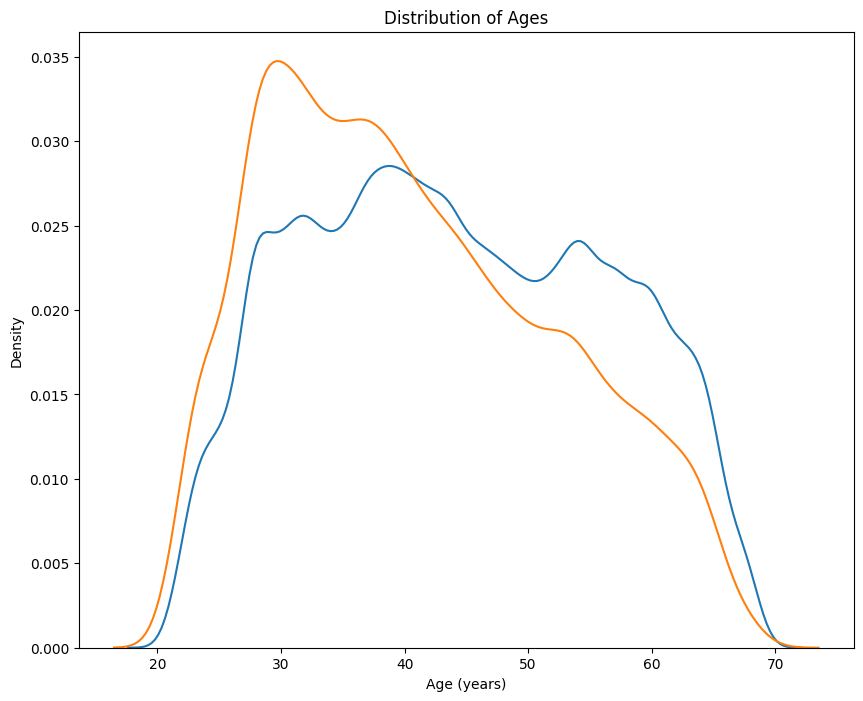

In [32]:
plt.figure(figsize = (10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans which were not repaid on time
sns.kdeplot(app_train.loc[app_train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [36]:
# Age information into a separate dataframe (make a copy!)
age_data = app_train[['TARGET', 'DAYS_BIRTH']].copy()

# Convert DAYS_BIRTH to years
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins=np.linspace(20, 70, 11))

# Preview
age_data.head(10)


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [42]:
# Global default probability
default_rate = app_train["TARGET"].mean() * 100
print(f"Overall failure to repay: {default_rate:.2f}%")


Overall failure to repay: 8.07%


In [44]:
print(app_train[["TARGET","DAYS_BIRTH","AMT_INCOME_TOTAL","OCCUPATION_TYPE"]].head())
print(app_train["TARGET"].value_counts())


   TARGET  DAYS_BIRTH  AMT_INCOME_TOTAL OCCUPATION_TYPE
0       1        9461          202500.0        Laborers
1       0       16765          270000.0      Core staff
2       0       19046           67500.0        Laborers
3       0       19005          135000.0        Laborers
4       0       19932          121500.0      Core staff
TARGET
0    282686
1     24825
Name: count, dtype: int64


In [48]:
# Convert DAYS_BIRTH to AGE using absolute value
app_train["AGE"] = app_train["DAYS_BIRTH"].abs() // 365

# Check actual age range
print("Age range:", app_train["AGE"].min(), "to", app_train["AGE"].max())


Age range: 20 to 69


  AGE_GROUP    TARGET
0       20s  0.113983
1       30s  0.092869
2       40s  0.075510
3       50s  0.059334
4       60s  0.049203


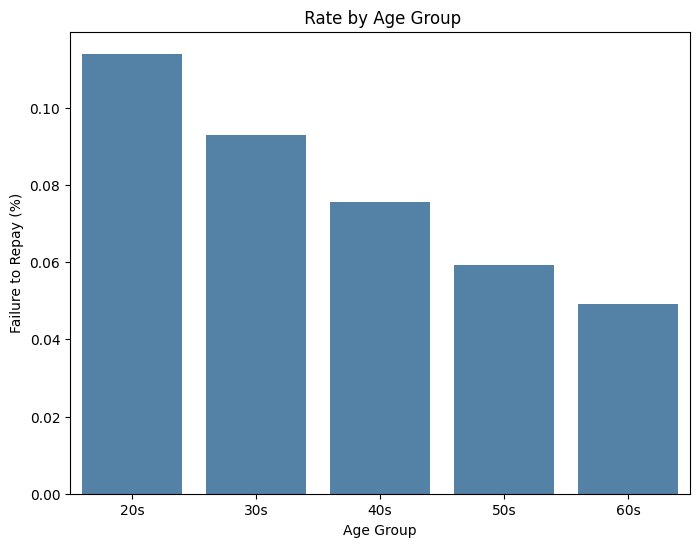

In [50]:
# Bin ages into groups
app_train["AGE_GROUP"] = pd.cut(
    app_train["AGE"], 
    bins=[20,30,40,50,60,70], 
    labels=["20s","30s","40s","50s","60s"], 
    include_lowest=True
)

# Group and calculate default probability
age_groups = app_train.groupby("AGE_GROUP", observed=True)["TARGET"].mean().reset_index()

print(age_groups)   # check values before plotting

# Plot
plt.figure(figsize=(8,6))
sns.barplot(x="AGE_GROUP", y="TARGET", data=age_groups, color="steelblue")
plt.ylabel("Failure to Repay (%)")
plt.xlabel("Age Group")
plt.title(" Rate by Age Group")
plt.show()
